In [1]:
#install Kaggle
!pip install -q kaggle

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#to list all the datasets in kaggle
!kaggle datasets list

In [ ]:
# Step 4: Download the dataset
!kaggle datasets download -d teertha/ushealthinsurancedataset

In [ ]:
# Step 5: Unzip the dataset
!unzip ushealthinsurancedataset.zip

In [9]:
# Step 6: Now you can load the data into pandas
import pandas as pd
df = pd.read_csv('insurance.csv')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('insurance.csv')

In [12]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer_0_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_2_4 = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer_2_4.fit(x[:, 2:4])
imputer_0_1.fit(x[:, 0:1])

x[:, 2:4] = imputer_2_4.transform(x[:, 2:4])
x[:, 0:1] = imputer_0_1.transform(x[:, 0:1])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
x[:,4] = le.fit_transform(x[:,4])

In [15]:
#Encoding the independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [64]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model (customize hyperparameters if needed)
dt_regressor = DecisionTreeRegressor(
    max_depth=4,        # Control tree depth to prevent overfitting
    min_samples_split=2 # Minimum samples required to split a node
)

# Train the model
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [65]:
y_pred = dt_regressor.predict(x_test)

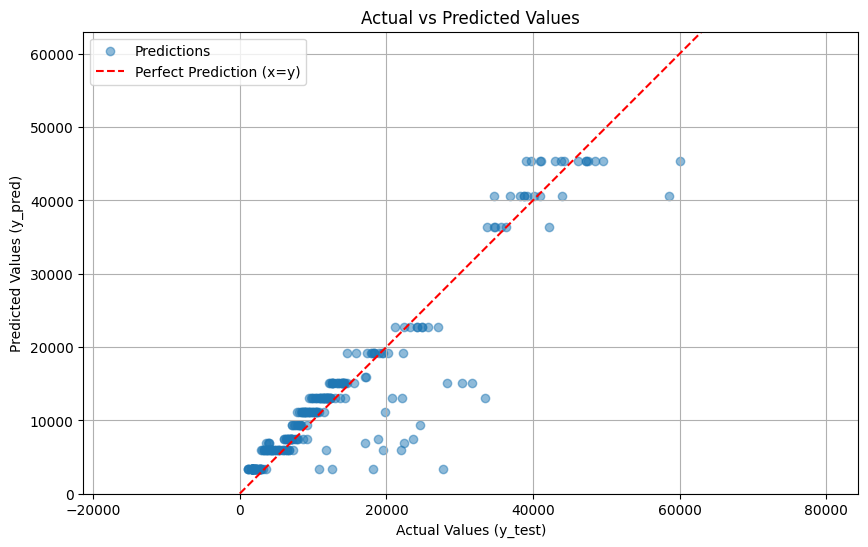

In [66]:
# Assuming y_pred and y_test are your arrays
plt.figure(figsize=(10, 6))

# Scatter plot of predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')

# Add the x=y line (perfect prediction line)
max_val = max(np.max(y_test), np.max(y_pred)) * 1.05
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction (x=y)')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Set equal aspect ratio
plt.axis('equal')
plt.xlim(0, max_val)
plt.ylim(0, max_val)

plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 19278240.32
R² Score: 0.87
